<a href="https://colab.research.google.com/github/chikakoto/facial-expression-recognition/blob/rabi/notebooks/rabiuls_notebook/RH_SGD_RF_v3_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source 
https://www.kaggle.com/datasets/msambare/fer2013
https://drive.google.com/file/d/168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-/view?usp=sharing 


Regularized linear models with Stochastic Gradient Descent (SGD)

# Importing Library & Downloading Raw data

In [ ]:
# Importing basic python Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread
from glob import glob
from scipy import ndimage as ndi
from skimage import feature


#Model
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

#Metrics
from sklearn.model_selection import train_test_split, learning_curve, validation_curve, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

#GridSearch & Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler


import math
from tensorflow.keras.utils import to_categorical

from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline
from collections import Counter
import random

In [ ]:
from skimage import feature
import pickle

In [ ]:
#mounting google drive and navigating to project folder
from google.colab import drive
drive.mount('/content/drive')
# %cd drive/MyDrive/Colab Notebooks/facial-expression-recognition

Mounted at /content/drive


#Data

In [ ]:
#navigating to project folder in Google Drive 
%cd /content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/Version_2.0

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/Version_2.0


In [ ]:
emotion_labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}

In [ ]:
emotion_labels = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}
X_train, X_test, y_train, y_test = custom_train_test_split('data/hog_scaled2.csv', 3)

data/hog_scaled2.csv
Shape of data > : (X_train, X_test, y_train, y_test) (31432, 2304) (7896, 2304) (31432,) (7896,)


In [ ]:
print(type(X_train), type(X_test), type(y_train), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
len(X_train[0])

2304

In [ ]:
y_train[0]

2

In [ ]:
#Orginal Data 
model = SGDClassifier(random_state=42, max_iter=5000, tol=1e-3, n_jobs = -1,shuffle=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#model_score=accuracy_score(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred)
print(model.score(X_test, y_test))

0.37360688956433635


In [ ]:
#Orginal Data 
model = SGDClassifier(random_state=42, max_iter=5000, tol=1e-3, n_jobs = 8,shuffle=True
                      ,class_weight= 'balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#model_score=accuracy_score(y_test, y_pred)
#cm = confusion_matrix(y_test, y_pred)
print(model.score(X_test, y_test))

0.3696808510638298


In [ ]:
from sklearn.model_selection import GridSearchCV

#GridSearchCV

## SGDClassifier - GridSearchCV

In [ ]:
model = SGDClassifier(random_state=42)
loss = ['hinge','log', 'modified_huber','squared_hinge']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1]
learning_rate = ['optimal']

param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate)

grid = GridSearchCV(estimator=model, 
param_grid=param_distributions, 
scoring='roc_auc', 
verbose=1, 
n_jobs=-1) 

In [ ]:
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  category=UserWarning,


Best Score:  nan
Best Params:  {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}


this took 1 hour and 56 minutes for Fitting 5 folds for each of 60 candidates, totalling 300 fits

Fitting 5 folds for each of 60 candidates, totalling 300 fits
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  category=UserWarning,
Best Score:  nan
- Best Params:  
- {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}

## RandomForest Grid Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
grid_cv = {'n_estimators': [100, 200, 400, 800, 1600, 2000],
     'max_features': ['auto', 'sqrt'],
     'max_depth': [10, 20, 40, 60, 80]}
     #'min_samples_split': [2, 5, 10,50,100],
     #'min_samples_leaf': [1, 2, 4,10]}

In [ ]:
g = {'n_estimators': [100, 200, 400, 800, 1600, 2000],
     'max_features': ['auto', 'sqrt'],
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
     'min_samples_split': [2, 5, 10,50,100],
     'min_samples_leaf': [1, 2, 4]}

In [ ]:
rf_grid_cv = GridSearchCV(estimator = rf, param_grid = grid_cv,
                          cv = 5, verbose=2,n_jobs = 8,scoring= 'accuracy')

In [ ]:
%time rf_grid_cv.fit(X_train, y_train)
print(rf_grid_cv.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 5min 12s, sys: 14.8 s, total: 5min 27s
Wall time: 5h 50min 27s
{'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 800}


Fitting 5 folds for each of 60 candidates, totalling 300 fits
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
- CPU times: user 5min 12s, sys: 14.8 s, 
- total: 5min 27s
- Wall time: 5h 50min 27s

- {'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 800}

 Because of memory issue we have splited grid search into two part 
 - part one: n_estimators and 
 - max_features
 - max_features

In [ ]:
grid_cv = {'n_estimators': [800,2000], 
           'max_features': [ 'sqrt'],
           'max_depth': [60],
           'min_samples_split': [2, 5, 10,50,100],
           'min_samples_leaf': [1, 2, 4,10]}

In [ ]:
rf_grid_cv = GridSearchCV(estimator = rf, param_grid = grid_cv,
                          cv = 5, verbose=2,n_jobs = -1,scoring= 'accuracy')

In [ ]:
#ReExecuting grid search to pick best min sample split and min sample leafe 
#aganist current best of n_estimators, max_features and max_depth
%time rf_grid_cv.fit(X_train, y_train)
print(rf_grid_cv.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CPU times: user 13min 27s, sys: 30.7 s, total: 13min 58s
Wall time: 5h 59min 19s
{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}


### Test RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#X_train, X_test, y_train, y_test
rf_org = RandomForestClassifier(n_estimators=500,max_features='auto',random_state=101, n_jobs=-1)
rf_org.fit(X_train,y_train)

result = rf_org.score(X_test, y_test)
print(result)

0.5481256332320162


In [ ]:
print(rf_org.max_depth)

None


Fitting 3 folds for each of 100 candidates, totalling 300 fits
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning

In [ ]:
csv_list = ['data/hog_data2.csv', 'data/hog_scaled2.csv']
hog_predictions = []
hog_actuals = []
for i in range(len(csv_list)):
    pred, act = processSVM(csv_list[i], 3)
    hog_predictions.append(pred)
    hog_actuals.append(act)

data/hog_data2.csv
(31432, 2304)
(31432,)
(7896, 2304)
(7896,)
Train Accuracy: 0.999
Test Accuracy: 0.405
data/hog_scaled2.csv
(31432, 2304)
(31432,)
(7896, 2304)
(7896,)


In [ ]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [ ]:
#emotion_labels = {0:‘angry’, 2:‘fear’, 3:‘happy’, 4:‘sad’, 5:‘surprise’, 6:‘neutral’}
#Please ignore this step if you downloaded the zip file from above step 
#Downloading raw image zip file from google drive
from zipfile import ZipFile
!gdown --id 168XK2dmyPg9d6AI3cgbxhCXdIow7uVK- -O archive.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-
To: /content/archive.zip
100% 63.3M/63.3M [00:01<00:00, 50.0MB/s]


In [ ]:
#Unzippliing the zip file 
with ZipFile('/content/archive.zip', 'r') as f:
  f.extractall()

In [ ]:
# Data files directory
train_dir = '/content/train'
test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
emotions_labelss = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}

In [ ]:
#X_train, X_test, y_train, y_test
X_train_org, y_train_org, lb = import_data_return2set(train_dir, emotions)
X_test_org, y_test_org, lb = import_data_return2set(test_dir, emotions)
#print(X_train_org.shape, X_test_org.shape, y_train_org.shape, y_test_org.shape)
print(len(X_train_org), len(X_test_org), len(y_train_org), len(y_test_org))

28709 7178 28709 7178


#QA

In [ ]:
#Converting data to numpy array and reshaping it
X_train = np.array(X_train_org).reshape(28709,48*48 )
y_train = np.array(y_train_org)
X_test = np.array(X_test_org).reshape(7178,48*48 )
y_test = np.array(y_test_org)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        SGDClassifier(random_state=42, max_iter=5000, tol=1e-3))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test Accuracy: 0.185


In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [3595  392 3688 6493 4347 2854 4469], Acc: 0.151
Fold:  2, Class dist.: [3595  393 3687 6493 4347 2854 4469], Acc: 0.205
Fold:  3, Class dist.: [3595  393 3687 6493 4347 2854 4469], Acc: 0.188
Fold:  4, Class dist.: [3595  393 3687 6494 4347 2854 4468], Acc: 0.206
Fold:  5, Class dist.: [3595  393 3687 6494 4347 2854 4468], Acc: 0.234
Fold:  6, Class dist.: [3596  392 3687 6494 4347 2854 4468], Acc: 0.216
Fold:  7, Class dist.: [3596  392 3687 6494 4347 2854 4468], Acc: 0.163
Fold:  8, Class dist.: [3596  392 3687 6494 4347 2854 4468], Acc: 0.187
Fold:  9, Class dist.: [3596  392 3688 6493 4347 2853 4469], Acc: 0.213
Fold: 10, Class dist.: [3596  392 3688 6493 4347 2854 4469], Acc: 0.168

CV accuracy: 0.193 +/- 0.025


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.19470568 0.23267154 0.22849181 0.20585162 0.18913271 0.17485197
 0.20794148 0.19923372 0.2246604  0.19616725]
CV accuracy: 0.205 +/- 0.018


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        SGDClassifier(loss='log', penalty='l2',alpha=0.1,max_iter=5000, tol=1e-3, random_state=42))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr, X=X_train,
                                                       y=y_train, train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10, n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

### Addressing over- and underfitting with validation curves

In [ ]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='SGDClassifier', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

In [ ]:
clf = gs.best_estimator_

# clf.fit(X_train, y_train) 
# note that we do not need to refit the classifier
# because this is done automatically via refit=True.

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

In [ ]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

#QA2

In [ ]:
unique, counts = np.unique(y_train_org, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 3995]
 [   1  436]
 [   2 4097]
 [   3 7215]
 [   4 4830]
 [   5 3171]
 [   6 4965]]


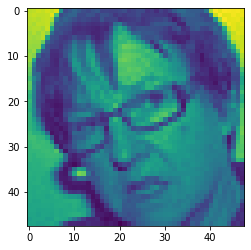

In [ ]:
plt.imshow(X_train_org[1])

In [ ]:
X_train_hog = np.array([feature.hog(image) for image in X_train_org])
X_train_hog.shape

(28709, 1296)

In [ ]:
# split the dataframe in to train, test and validation data frames
X_train, X_val, y_train, y_val = train_test_split(X_train_hog, np.array(y_train_org), test_size = 0.01, shuffle = True)
X_train.shape, y_train.shape

((28421, 1296), (28421,))

In [ ]:
X_Test_hog = np.array([feature.hog(image) for image in X_test_org])
X_Test_hog.shape

(7178, 1296)

# #Basic ML LIB

#imbalance data 

In [ ]:
Xtr_b = np.array(X_train_org)
Xtr_b = np.stack(Xtr_b, axis = 0)
Xtr_b = Xtr_b.reshape(28709, 48,48)
y_tr = np.array(y_train_org)
print(Xtr_b.shape,y_tr.shape)

(28709, 48, 48) (28709,)


In [ ]:
print(Xtr_b.shape,y_tr.shape)

### under sample

In [ ]:
pp = Pipeline([('rus',RandomUnderSampler(random_state=0, replacement=False))])
#pp = Pipeline([('tk',TomekLinks()),('ros',RandomUnderSampler(random_state=0))])
train_image_usample, train_label_usample = pp.fit_resample(Xtr_b.reshape(Xtr_b.shape[0],48*48), y_tr)
print(Counter(train_label_usample))
train_image_usample = train_image_usample.reshape(train_image_usample.shape[0], 48, 48)
print(train_image_usample.shape,train_label_usample.shape)

Counter({0: 436, 1: 436, 2: 436, 3: 436, 4: 436, 5: 436, 6: 436})
(3052, 48, 48) (3052,)


In [ ]:
unique, counts = np.unique(train_label_usample, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 436]
 [  1 436]
 [  2 436]
 [  3 436]
 [  4 436]
 [  5 436]
 [  6 436]]


In [ ]:
#print(len(X_train_org), len(X_test_org), len(y_train_org), len(y_test_org))
Xt_b = np.array(X_test_org)
Xt_b = np.stack(Xt_b, axis = 0)
Xt_b = Xt_b.reshape(7178, 48,48)
yt = np.array(y_test_org)
print(yt.shape, Xt_b.shape)

(7178,) (7178, 48, 48)


In [ ]:
pp = Pipeline([('rus',RandomUnderSampler(random_state=0, replacement=False))])
test_image_usample, test_label_usample = ppt.fit_resample(Xt_b.reshape(Xt_b.shape[0],48*48), yt)
print(Counter(test_label_usample))
test_image_usample = test_image_usample.reshape(test_image_usample.shape[0], 48, 48)
c

unique, counts = np.unique(test_label_usample, return_counts=True)
print(np.asarray((unique, counts)).T)

Counter({0: 1716, 1: 1716, 2: 1716, 3: 1716, 6: 1716, 4: 1716, 5: 1716})
(12012, 48, 48) (12012,)
[[   0 1716]
 [   1 1716]
 [   2 1716]
 [   3 1716]
 [   4 1716]
 [   5 1716]
 [   6 1716]]


## OverSample

In [ ]:
Xtr_b = np.array(X_train_org)
Xtr_b = np.stack(Xtr_b, axis = 0)
Xtr_b = Xtr_b.reshape(28709, 48,48)
y_tr = np.array(y_train_org)
print(Xtr_b.shape,y_tr.shape)

In [ ]:
# pp = Pipeline([('rus',RandomUnderSampler(random_state=0, replacement=False))])
pp = Pipeline([('tk',TomekLinks()),('ros',RandomOverSampler(random_state=0))])
train_image_array, train_image_label = pp.fit_resample(Xtr_b.reshape(Xtr_b.shape[0],48*48), y_tr)
print(Counter(train_image_label))
train_image_array = train_image_array.reshape(train_image_array.shape[0], 48, 48)

Counter({0: 7025, 1: 7025, 2: 7025, 3: 7025, 6: 7025, 4: 7025, 5: 7025})


In [ ]:
train_image_array.shape

(49175, 48, 48)

In [ ]:
print(train_image_label.shape)
unique, counts = np.unique(train_image_label, return_counts=True)
print(np.asarray((unique, counts)).T)

(49175,)
[[   0 7025]
 [   1 7025]
 [   2 7025]
 [   3 7025]
 [   4 7025]
 [   5 7025]
 [   6 7025]]


In [ ]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48))
train_images = train_images.astype('float32')
train_images.shape
#(49175, 48, 48) - shpae 

In [ ]:
def sample_plot(x,y=None):
    #x, y are numpy arrays
    n = 20
    samples = random.sample(range(x.shape[0]),n)
    
    fig, axs = plt.subplots(2,10, figsize=(25,5), sharex=True, sharey=True)
    ax = axs.ravel()
    for i in range(n):
        ax[i].imshow(x[samples[i],:,:], cmap=plt.get_cmap('gray'))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        if y is not None:
            ax[i].set_title(emotions_labelss[y[samples[i]]])

In [ ]:
emotions_labelss = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

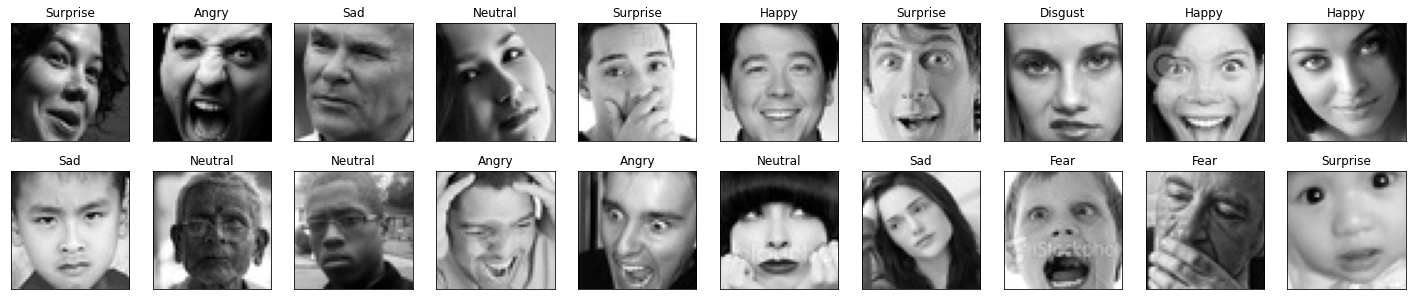

In [ ]:
sample_plot(train_image_array, train_image_label)

In [ ]:
X_train_hog_b = np.array([feature.hog(image) for image in train_images])
print(X_train_hog_b.shape,train_image_label.shape)

(49175, 1296) (49175,)


In [ ]:
#print(len(X_train_org), len(X_test_org), len(y_train_org), len(y_test_org))
Xt_b = np.array(X_test_org)
Xt_b = np.stack(Xt_b, axis = 0)
Xt_b = Xt_b.reshape(7178, 48,48)
yt = np.array(y_test_org)
print(yt.shape, Xt_b.shape)

(7178,) (7178, 48, 48)


In [ ]:
# pp = Pipeline([('rus',RandomUnderSampler(random_state=0, replacement=False))])
ppt = Pipeline([('tk',TomekLinks()),('ros',RandomOverSampler(random_state=0))])
test_image_array, test_image_label = ppt.fit_resample(Xt_b.reshape(Xt_b.shape[0],48*48), yt)
print(Counter(test_image_label))
test_image_array = test_image_array.reshape(test_image_array.shape[0], 48, 48)
print(test_image_array.shape,test_image_label.shape )

unique, counts = np.unique(test_image_label, return_counts=True)
print(np.asarray((unique, counts)).T)

Counter({0: 1716, 1: 1716, 2: 1716, 3: 1716, 6: 1716, 4: 1716, 5: 1716})
(12012, 48, 48) (12012,)
[[   0 1716]
 [   1 1716]
 [   2 1716]
 [   3 1716]
 [   4 1716]
 [   5 1716]
 [   6 1716]]


In [ ]:
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48))
test_images = test_images.astype('float32')
print(test_images.shape)
X_test_hog_b = np.array([feature.hog(image) for image in test_images])
print(X_test_hog_b.shape,test_image_label.shape)

(12012, 48, 48)
(12012, 1296) (12012,)


# this section is for SIFT dat 

In [ ]:
#emotion_labels = {0:‘angry’, 2:‘fear’, 3:‘happy’, 4:‘sad’, 5:‘surprise’, 6:‘neutral’}
df_sift = pd.read_csv('/content/sift_data.csv')
print(df_sift.shape)
df_sift.head(2)

(35322, 3)


,usage,emotion,histogram
0,train,3,4 3 6 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,train,3,2 8 4 4 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [ ]:
print('Columns: ', df_sift.columns)
print('shape of df: ', df_sift.shape)
print('unique emotion labels: ', df_sift.emotion.unique())
print('data type for (emotion, data): ', type(df_sift.emotion[0]), type(df_sift.histogram[0]), len(df_sift.histogram[0]))

Columns:  Index(['usage', 'emotion', 'histogram'], dtype='object')
shape of df:  (35322, 3)
unique emotion labels:  [3 4 2 5 6 0]
data type for (emotion, data):  <class 'numpy.int64'> <class 'str'> 57


In [ ]:
print('len of histogram: ',len(df_sift.histogram[0].split(' ')))
print( 'value counts for each emotion: ','\n', df_sift.emotion.value_counts())

len of histogram:  29
value counts for each emotion:  
 3    8987
6    6195
4    6076
2    5119
0    4945
5    4000
Name: emotion, dtype: int64


In [ ]:
emotion_remap = {0:0, 2:1, 3:2, 4:3, 5:4, 6:5}
print('data type for emotion: ',type(df_sift.emotion[0]))


data type for emotion:  <class 'numpy.int64'>


In [ ]:
#remapping each emotion to a new label
df_sift.emotion = df_sift.emotion.apply(lambda x: emotion_remap[x])
print( 'value counts for each emotion after remaping: ','\n', sorted(df_sift.emotion.value_counts()))

value counts for each emotion after remaping:  
 [4000, 4945, 5119, 6076, 6195, 8987]


In [ ]:
#chikako's funciton 
def load_data(df, sift):
    image_data = []
    
    for index, row in df.iterrows():
        if sift == 1:
            field = row.histogram
        else:
            field = row.pixels
        image = np.fromstring(field, dtype=int, sep=' ')
        #scale = np.fromstring(row.scaled_pixels, dtype=int, sep=' ')
        #image = np.reshape(image, (48, 48))
        image_data.append(image)
        #image_scaled.append(scale)
        
    return image_data

In [ ]:
df_train = df_sift[df_sift['usage']=='train']
df_test = df_sift[df_sift['usage']=='test']
train_data = load_data(df_train, 1)
train_target = list(df_train.emotion)
test_data = load_data(df_test, 1)
test_target = list(df_test.emotion)

In [ ]:
X_train = np.array(train_data)
y_train = np.array(train_target)
X_test = np.array(test_data)
y_test = np.array(test_target)
print('shape of each data set: \n(X_train, y_train, X_test ,y_test)\n', 
      X_train.shape,y_train.shape,X_test.shape,y_test.shape)


shape of each data set: 
(X_train, y_train, X_test ,y_test)
 (28257, 29) (28257,) (7065, 29) (7065,)


In [ ]:
#running basic SVC
svm = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
print('Test Accuracy: %.3f' % svm.score(X_test, y_test))
y_test2 = y_test

In [ ]:
#Basic SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.2251946213729653

In [ ]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 

In [ ]:
cross_val_score(sgd, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


array([0.1692324 , 0.20660367, 0.14555685])

In [ ]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',
        'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet']

alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']

class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}] 

eta0 = [1, 10, 100] 

param_distributions = dict(loss=loss,penalty=penalty, alpha=alpha,learning_rate=learning_rate,
                           class_weight=class_weight, eta0=eta0)


In [ ]:
# sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 

random = RandomizedSearchCV(estimator=sgd,
                            param_distributions=param_distributions, 
                            scoring='roc_auc', 
                            verbose=1, n_jobs=-1, 
                            n_iter=1000) 

In [ ]:
random_result = random.fit(X_train, y_train) 

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
model = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
model.fit(X_train,y_train)
model_pred = model.predict(X_test)
accuracy_score(model_pred,y_test)

0.2005661712668082

In [ ]:
pip install parfit

In [ ]:
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import parfit.parfit as pf
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
# X_train.shape,y_train.shape,X_test.shape,y_test.shape)
# X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_test, y_test, test_size = 0.5, shuffle = True)

In [ ]:


grid = {
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
    #'n_iter': [1000], # number of epochs
    'loss': ['log'], # logistic regression,
    'penalty': ['l2'],
    'n_jobs': [-1]
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
                                                        X_train, y_train, X_val, y_val,
                                                        metric = roc_auc_score,
                                                        scoreLabel = "AUC")

print(bestModel, bestScore)

In [ ]:
print('shape of each data set: \n(X_train, y_train, X_test ,y_test)\n', 
      X_train.shape,y_train.shape,X_test.shape,X_test.shape)


shape of each data set: 
(X_train, y_train, X_test ,y_test)
 (28257, 29) (28257,) (7065, 29) (7065,)


In [ ]:

parameters = {'penalty': ['l2', None],
              'alpha': [1e-07, 1e-06, 1e-05, 1e-04],
              'eta0': [0.01, 0.1, 1, 10]}
sgd_lr = SGDClassifier(loss='log', learning_rate='constant', 
                      eta0=0.01, fit_intercept=True, max_iter=50)
grid_search = GridSearchCV(sgd_lr, parameters, 
                           n_jobs=-1, cv=3)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'alpha': 1e-05, 'eta0': 0.01, 'penalty': 'l2'}


In [ ]:
sgd_lr_best = grid_search.best_estimator_
accuracy = sgd_lr_best.score(X_test , y_test)

print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

The accuracy on testing set is: 14.2%


In [ ]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=5000)
clf = GridSearchCV(model, param_grid=params)



In [ ]:
clf.fit(X_train, y_train)
print(clf.best_score_)

0.255299571201159


In [ ]:
sgd_lr_best = clf.best_estimator_
accuracy = sgd_lr_best.score(X_test , X_test)

print('The accuracy on testing set is: {0:.1f}%'.format(accuracy*100))

In [ ]:
print(grid_search.best_params_)

{'alpha': 1e-05, 'eta0': 0.01, 'penalty': 'l2'}


In [ ]:
clf.best_estimator_

SGDClassifier(alpha=0.1, loss='log', max_iter=5000, penalty='l1')

In [ ]:
#Basic SGDClassifier
# X_train.shape,y_train.shape,X_test.shape,X_test.shape)
sgd_clf = SGDClassifier(random_state=42, alpha=0.1, loss='log', max_iter=5000, penalty='l1', tol=1e-3)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.25095541401273885

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.25095541401273885

In [ ]:
print(classification_report(y_test, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

In [ ]:
grid_search

In [ ]:
print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))

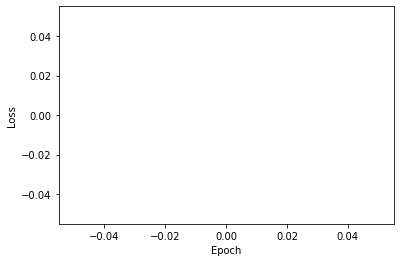

In [ ]:
# from sklearn.linear_model import SGDRegressor

# model = SGDRegressor(verbose=1)

with DisplayLossCurve():
  clf.fit(X_train, y_train)

# OR

# with DisplayLossCurve(print_loss=True):
#   model.fit(X, Y)

In [ ]:
import sys
import io
import matplotlib.pyplot as plt

class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))
      
    return True

In [ ]:
random = GridSearchCV(estimator=sgd, param_distributions,
                            scoring='roc_auc', 
                            verbose=1, n_jobs=-1, 
                            n_iter=1000) 

In [ ]:
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, random,
                                                        X_train, y_train, X_val, y_val,
                                                        metric = roc_auc_score,
                                                        scoreLabel = "AUC")

print(bestModel, bestScore)

# Basic Data preprocessing

In [ ]:
# Data files directory
train_dir = '/content/train'
test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

In [ ]:
def import_data(dir):
  '''this funciton will be used to extract image data into 2 list,
  1st list labels will contain labels information and 
  2nd list images will contain flaten pixels of each image.
  - image data is already reshed into 48,48 numpy array'''

  data=[]
  for directory in sorted(glob(dir+'/*')):
    image_files = glob(directory + '/*.jpg')
    label = directory.split('/')[-1]
    for image_file in image_files:
      image = resize(imread(image_file), (48,48))
      data.append(( label, image))
  return data

In [ ]:
def import_data(dir_loc):
  '''this funciton will be used to extract image data into 3 list, list file will contain file name
  list labels will contain labels information and list images will contain flaten pixels of each image'''
  data=[]
  # train_files = []
  # train_labels = []
  # train_images = []
  for dirname, dirs, filenames in os.walk(dir_loc, topdown=True):
      cat = dirname.replace(dir_loc, '')
      if cat != '':
          cat = cat.replace('/', '')
          for filename in filenames:
              file = os.path.join(dirname, filename)
              image = mpimg.imread(file).flatten()
              data.append((file, cat, image))
              # train_files.append(file)
              # train_images.append(image)
              # train_labels.append(cat)
  return data

In [ ]:
#processing data and saving it in list 
# train_file, train_label, train_image = import_data(train_dir)
# print('length of each traning list: ', len(train_file), len(train_label), len(train_image))

#or create a DF 

df_train = pd.DataFrame(data = import_data(train_dir), 
                  columns = ['label','image'])
print(df_train.shape)
df_train.head(2)

(28709, 2)


,label,image
0,angry,"[[0.8235294117647012, 0.5960784313725466, 0.42..."
1,angry,"[[0.2627450980392157, 0.3098039215686276, 0.34..."


In [ ]:
df_train.label.unique()
#emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [ ]:
df_train.label = df_train.label.apply(lambda x: emotions[x])
df_train.label.unique()

array([0, 1, 2, 3, 6, 4, 5])

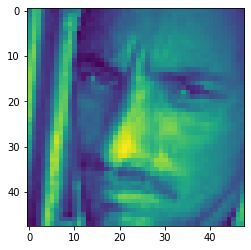

In [ ]:
#visualizing sample image
plt.imshow(df_train['image'][100])

In [ ]:
#checking forn null nalue 
df_train.image.isnull().sum()

0

# Image Augmention

In [ ]:
import copy 
df_copy = copy.copy(df_train)
col = df_copy.columns
print(col)

Index(['label', 'image'], dtype='object')


In [ ]:
df_copy['image'][0].shape

(48, 48)

In [ ]:
#horiontal flip
df_copy['image'] = df_copy['image'].apply(lambda x: (np.flip(x, axis=1)).reshape(48,48))

In [ ]:
df_copy['image'][0].shape

(48, 48)

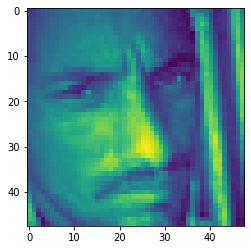

In [ ]:
plt.imshow(df_copy['image'][100]) #fliped image 

In [ ]:
#combined both df
# df_aug =  pd.concat([df_train, df_copy], axis=0)
df_aug = np.concatenate((df_train, df_copy))
print(df_aug.shape)
# df_aug.head(1)

(57418, 2)


# Affine transformation

In [ ]:
df_t = copy.copy(df_train)
df_t.head(2)

,label,image
0,0,"[[0.8235294117647012, 0.5960784313725466, 0.42..."
1,0,"[[0.2627450980392157, 0.3098039215686276, 0.34..."


In [ ]:
w, h = df_t.image[0].shape
print(w, h )

48 48


In [ ]:
#Apply identity transform:
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
#Apply identity transform:
mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-h],[0,0,1]])
#Scale the image (0.75 times along the x axis and 1.25 times along the y axis):
s_x, s_y = 0.75, 1.25
mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
#Rotate the image by 30° counter-clockwise. It's a composite operation—first, you will need to shift/center the image, 
#apply rotation, and then apply inverse shift:
theta = np.pi/6
mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),
                                                                  np.sin(theta),0],
                                                                 [np.sin(theta),-np.cos(theta),0],
                                                                 [0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])

#Apply shear transform to the image:
lambda1 = 0.5
mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])

In [ ]:
#image before transformation 
plt.imshow(df_t['image'][100])

NameError: ignored

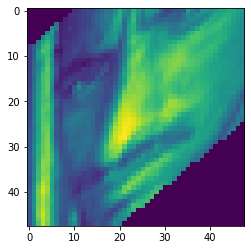

In [ ]:
#App.y transformation to the image 
mat_all = mat_identity @ mat_reflect @ mat_scale @ mat_rotate @ mat_shear
df_t['image'] = df_t['image'].apply(lambda x: ndi.affine_transform(x, mat_all))
plt.imshow(df_t['image'][100])


In [ ]:
print ('shape of augmented dataframe: ',df_aug[0, 1].shape)
print ('shape of augmented dataframe: ',df_t['image'][0].shape)

shape of augmented dataframe:  (48, 48)
shape of augmented dataframe:  (48, 48)


In [ ]:
df_aug[0, 1].shape

(48, 48)

In [ ]:
# Combined both Augmentd DF and New trasformed DF 
#combined both DF
# df_final =  pd.concat([df_aug, df_t], axis=0)
df_final = np.concatenate((df_aug, df_t))
print(df_final.shape)

(86127, 2)


In [ ]:
#shape of individual image 
df_final[0, 1].shape

(48, 48)

# DATA NORMALIZATION

In [ ]:
# image pre-processing

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

#HOG SVC

In [ ]:
#running basic SVC
svm = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_Test_hog)
# print('Test Accuracy: %.3f' % svm.score(X_test, y_test))
# y_test2 = y_test

In [ ]:
y_test = np.array(y_test_org)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.4612705488994149


array([[ 262,    0,   81,  200,  202,   45,  168],
       [  36,    0,   16,   18,   27,    5,    9],
       [ 116,    0,  218,  206,  204,  111,  169],
       [  85,    0,   60, 1348,  140,   36,  105],
       [ 144,    0,   99,  267,  447,   20,  270],
       [  49,    0,   79,  113,   57,  445,   88],
       [  97,    0,   62,  222,  215,   46,  591]])

In [ ]:
print('Test Accuracy: %.3f' % svm.score(X_Test_hog, y_test))

Test Accuracy: 0.461


In [ ]:
cm

array([[ 262,    0,   81,  200,  202,   45,  168],
       [  36,    0,   16,   18,   27,    5,    9],
       [ 116,    0,  218,  206,  204,  111,  169],
       [  85,    0,   60, 1348,  140,   36,  105],
       [ 144,    0,   99,  267,  447,   20,  270],
       [  49,    0,   79,  113,   57,  445,   88],
       [  97,    0,   62,  222,  215,   46,  591]])

NameError: ignored

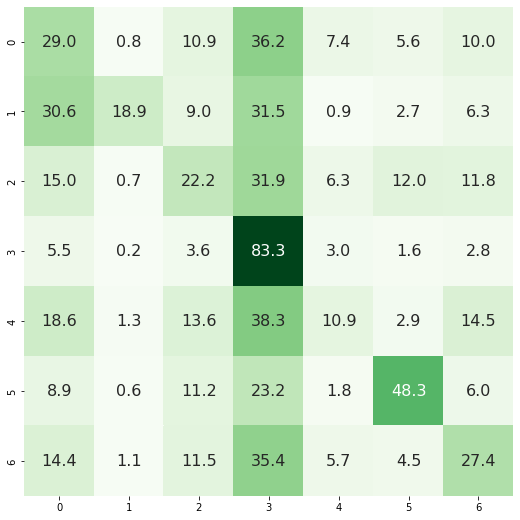

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# confusion matrix with actual label names
#cm_labels = confusion_matrix(test_labels, predicted_labels.argmax(axis=1))
# normalizing the values
cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm_labels_norm = cm_labels_norm * 100.00

plt.figure(figsize=(9,9))
sns.heatmap(cm_labels_norm,
            annot=True, 
            annot_kws={'size':16},
            fmt=".1f",
           cmap='Greens',
           xticklabels=[i for i in emotions.values()],
           yticklabels=[i for i in emotions.values()],
           square=True,
           cbar=False)
plt.title('Test Accuracy Score: {0}%\n'.format("%.2f" % (results[1]*100.0)), size=24)
plt.tight_layout()
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel('Actual label', size=18)
plt.xlabel('Predicted label', size=18)
plt.show()

## svm with balanced data 

In [ ]:
#print(X_train_hog_b.shape,train_image_label.shape)
#print(X_test_hog_b.shape,test_image_label.shape)

svm_b = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm_b.fit(X_train_hog_b, train_image_label)
y_pred_p = svm_b.predict(X_test_hog_b)
accuracy_score(test_image_label, y_pred_p)


0.4566267066267066

In [ ]:
cm_SVM_B = confusion_matrix(test_image_label, y_pred_p)
cm_SVM_B

array([[ 586,  162,  161,  153,  277,  121,  256],
       [ 300, 1047,   84,   79,  105,   51,   50],
       [ 232,  148,  442,  166,  307,  233,  188],
       [ 148,   71,  107, 1053,  159,   65,  113],
       [ 271,  115,  191,  187,  556,   86,  310],
       [ 132,   63,  158,  114,   81, 1064,  104],
       [ 211,   79,  143,  161,  289,   96,  737]])

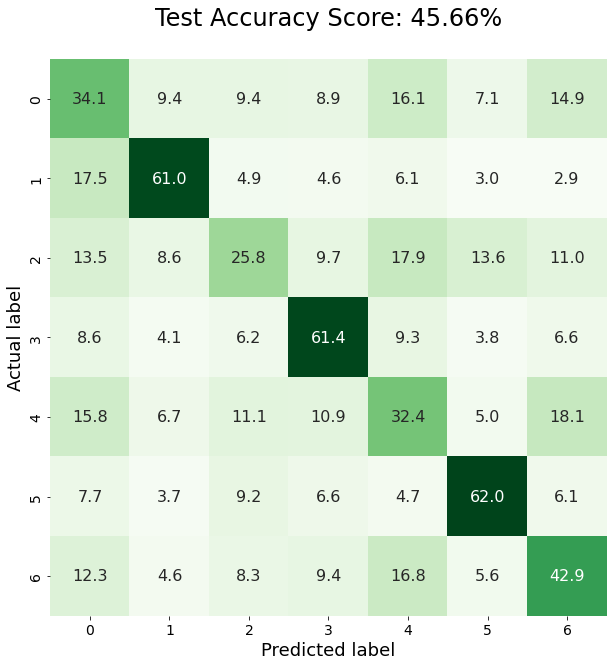

In [ ]:
cm_labels_norm = cm_SVM_B.astype('float') / cm_SVM_B.sum(axis=1)[:, np.newaxis]
cm_labels_norm = cm_labels_norm * 100.00

plt.figure(figsize=(9,9))
sns.heatmap(cm_labels_norm,
            annot=True, 
            annot_kws={'size':16},
            fmt=".1f",
           cmap='Greens',
           xticklabels=[i for i in emotions.values()],
           yticklabels=[i for i in emotions.values()],
           square=True,
           cbar=False)
plt.title('Test Accuracy Score: {0}%\n'.format("%.2f" % (0.45662*100.0)), size=24)
plt.tight_layout()
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel('Actual label', size=18)
plt.xlabel('Predicted label', size=18)
plt.show()

#SGD

##Orginal Data

In [ ]:
#navigating to SGD dir
%cd drive/MyDrive/Colab Notebooks/facial-expression-recognition/SGD


[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/facial-expression-recognition/SGD'
/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/SGD


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/SGD'

In [ ]:
#Converting data to numpy array and reshaping it
X_train_org_array = np.array(X_train_org).reshape(28709,48*48 )
y_train_org_array = np.array(y_train_org)
X_test_org_array = np.array(X_test_org).reshape(7178,48*48 )
y_test_org_array = np.array(y_test_org)

In [ ]:
#Orginal Data 
sgd_org = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_org.fit(X_train_org_array, y_train_org_array)
y_pred_org = sgd_org.predict(X_test_org_array)
score_sgd_org=accuracy_score(y_test_org_array, y_pred_org)
cm_sgd_org = confusion_matrix(y_test_org_array, y_pred_org)
print(score_sgd_org)
cm_sgd_org

0.2709668431317916


array([[ 36,   4,  11, 141, 703,   5,  58],
       [  0,   9,   0,  16,  81,   1,   4],
       [ 14,   5,  38, 102, 788,  11,  66],
       [ 15,   6,  14, 679, 976,   0,  84],
       [ 25,   5,  16, 121, 985,   5,  90],
       [  8,   3,   7,  73, 642,  56,  42],
       [ 22,   4,  20, 174, 870,   1, 142]])

In [ ]:
#Saving the model in google drive 
filename = 'sgd_org.sav'
pickle.dump(sgd_org, open(filename, 'wb'))

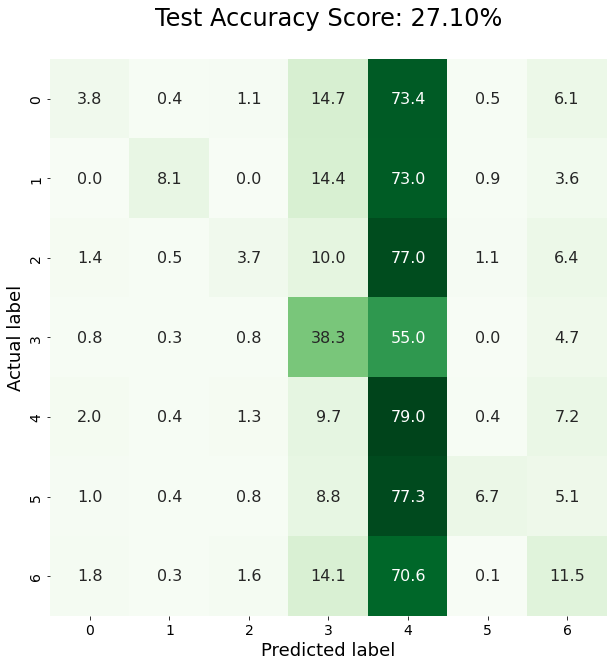

In [ ]:
plot_cm(cm_sgd_org,score_sgd_org)

## HoG

In [ ]:
#Orginal Data 
sgd_org_hog = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_org_hog.fit(X_train_hog, y_train_org_array)
y_pred_org = sgd_org_hog.predict(X_Test_hog)
score_sgd_org_hog=accuracy_score(y_test_org_array, y_pred_org)
cm_sgd_org_hog = confusion_matrix(y_test_org_array, y_pred_org)
print(score_sgd_org_hog)
cm_sgd_org_hog
#Saving the model in google drive 
filename = 'sgd_org_hog.sav'
pickle.dump(sgd_org_hog, open(filename, 'wb'))

0.4189189189189189


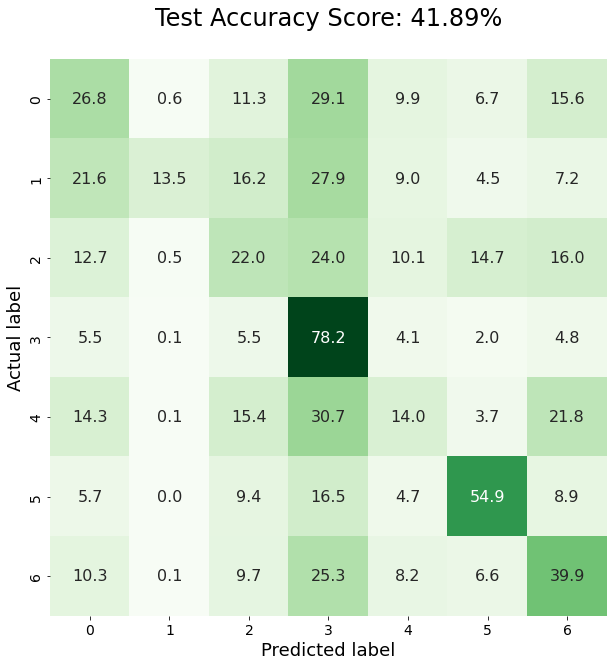

In [ ]:
plot_cm(cm_sgd_org_hog,score_sgd_org_hog)

In [ ]:
def plot_cm(cm,testscore):
  '''provide cm item and test score'''
  cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_labels_norm = cm_labels_norm * 100.00

  plt.figure(figsize=(9,9))
  sns.heatmap(cm_labels_norm,
              annot=True, 
              annot_kws={'size':16},
              fmt=".1f",
            cmap='Greens',
            xticklabels=[i for i in emotions.values()],
            yticklabels=[i for i in emotions.values()],
            square=True,
            cbar=False)
  plt.title('Test Accuracy Score: {0}%\n'.format("%.2f" % (testscore*100.0)), size=24)
  plt.tight_layout()
  plt.xticks(size=14)
  plt.yticks(size=14)
  plt.ylabel('Actual label', size=18)
  plt.xlabel('Predicted label', size=18)
  plt.show()

In [ ]:
xtr = resize(np.array(X_train_org).flatten(), (28709, 48*48))
#xt= np.array(X_test_org)
ytr= np.array(y_train_org)
yt= np.array(y_test_org)
xtr.shape

In [ ]:

unique, counts = np.unique(y_train, return_counts=True)

print(np.asarray((unique, counts)).T)

[[   0 3956]
 [   1  434]
 [   2 4052]
 [   3 7135]
 [   4 4788]
 [   5 3140]
 [   6 4916]]


In [ ]:
#processing data and saving it in list 
# train_file, train_label, train_image = import_data(train_dir)
# print('length of each traning list: ', len(train_file), len(train_label), len(train_image))

#or create a DF 

df_train = pd.DataFrame(data = import_data(train_dir), 
                  columns = ['label','image'])
print(df_train.shape)
df_train.head(2)

(28709, 2)


,label,image
0,angry,"[[0.4588235294117647, 0.45490196078431366, 0.4..."
1,angry,"[[0.7921568627450966, 0.6941176470588228, 0.69..."


In [ ]:
#Test data 
df_test = pd.DataFrame(data = import_data(test_dir), 
                  columns = ['label','image'])
print(df_test.shape)
df_test.head(2)

(7178, 2)


,label,image
0,angry,"[[0.2666666666666672, 0.294117647058825, 0.435..."
1,angry,"[[0.5568627450980366, 0.3843137254901948, 0.31..."


In [ ]:
df_train.image[0].shape

(48, 48)

In [ ]:
from skimage import feature

In [ ]:
img = df_train.image[0]

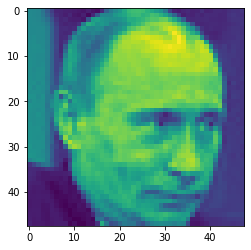

In [ ]:
plt.imshow(img)

In [ ]:
img_vec, img_hog = feature.hog(img,orientations=9,pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2),block_norm='L2', visualize=True )


# image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(3, 3), block_norm='L2-Hys', visualize=False, transform_sqrt=False, feature_vector=True, multichannel=None) -> (tuple[ndarray, ndarray | None] | ndarray)

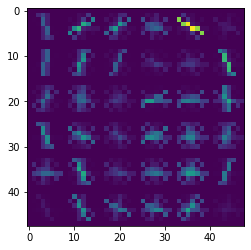

In [ ]:
plt.imshow(img_hog)

In [ ]:
img

array([[0.45882353, 0.45490196, 0.44705882, ..., 0.17647059, 0.17254902,
        0.18431373],
       [0.4627451 , 0.45490196, 0.44705882, ..., 0.18823529, 0.17647059,
        0.17254902],
       [0.46666667, 0.45882353, 0.45098039, ..., 0.18039216, 0.18039216,
        0.18039216],
       ...,
       [0.11764706, 0.11372549, 0.11764706, ..., 0.22745098, 0.22352941,
        0.22352941],
       [0.12156863, 0.10980392, 0.11372549, ..., 0.19607843, 0.2       ,
        0.20392157],
       [0.12941176, 0.10588235, 0.10980392, ..., 0.17647059, 0.18431373,
        0.19607843]])

In [ ]:
img_hog

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.02203491, ..., 0.00308197, 0.        ,
        0.        ],
       [0.        , 0.00097859, 0.        , ..., 0.        , 0.00191479,
        0.        ],
       ...,
       [0.        , 0.00060659, 0.        , ..., 0.        , 0.00426227,
        0.        ],
       [0.        , 0.        , 0.00076898, ..., 0.00121085, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
img_vec.shape

(900,)

In [ ]:
df_train['hog_vector'] = df_train.image.apply(lambda x:feature.hog(x, orientations=9, pixels_per_cell=(8, 8),
                                                                   cells_per_block=(2, 2),block_norm='L2', visualize=True))

In [ ]:
df_train.hog_vector[0][0].shape, df_train.hog_vector[0][1].shape

((900,), (48, 48))

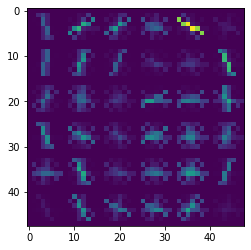

In [ ]:
plt.imshow(df_train.hog_vector[0][1])

In [ ]:
df_train['hog_vect'] = df_train.hog_vector.apply(lambda x: x[0])
df_train['hog_img'] = df_train.hog_vector.apply(lambda x: x[1])

In [ ]:
df_train.head()

,label,image,hog_vector,hog_vect,hog_img
0,angry,"[[0.4588235294117647, 0.45490196078431366, 0.4...","([0.1325764576815947, 0.0, 0.0, 0.0, 0.0035340...","[0.1325764576815947, 0.0, 0.0, 0.0, 0.00353407...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,angry,"[[0.7921568627450966, 0.6941176470588228, 0.69...","([0.17456213316691796, 0.24152990153107678, 0....","[0.17456213316691796, 0.24152990153107678, 0.1...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,angry,"[[0.44705882352941195, 0.4823529411764707, 0.5...","([0.0419715450029394, 0.04150716882215625, 0.1...","[0.0419715450029394, 0.04150716882215625, 0.13...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,angry,"[[0.07843137254901945, 0.06274509803921584, 0....","([0.12389765451368857, 0.3008676586094732, 0.2...","[0.12389765451368857, 0.3008676586094732, 0.28...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,angry,"[[8.359326303059913e-17, 0.011764705882352738,...","([0.07926251868880504, 0.05508558268279427, 0....","[0.07926251868880504, 0.05508558268279427, 0.0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


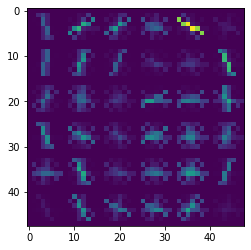

In [ ]:
plt.imshow(df_train.hog_img[0])

In [ ]:
type(df_train.hog_vect[0])

numpy.ndarray

In [ ]:
df_train.label = df_train.label.apply(lambda x:emotions[x])
df_train.label.value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: label, dtype: int64

In [ ]:
X_train = np.vstack(np.array(df_train.hog_vect))
y_train = np.array(df_train.label)
print(X_train.shape, y_train.shape)

(28709, 900) (28709,)


In [ ]:
#transform training data 
df_test['hog_vector'] = df_test.image.apply(lambda x:feature.hog(x, orientations=9, pixels_per_cell=(8, 8),
                                                                   cells_per_block=(2, 2),block_norm='L2', visualize=False))
print(df_test.shape)
df_test.head(2)

(7178, 3)


,label,image,hog_vector
0,angry,"[[0.2666666666666672, 0.294117647058825, 0.435...","[0.37649567509466225, 0.09541183875630241, 0.0..."
1,angry,"[[0.5568627450980366, 0.3843137254901948, 0.31...","[0.19525139086972118, 0.0858104238553717, 0.17..."


In [ ]:
#transform training data 
X_test = np.vstack(np.array(df_test.hog_vector))
y_test = np.array(df_test.label)
print(X_test.shape, y_test.shape)

(7178, 900) (7178,)


In [ ]:
#running basic SVC
svm = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
print('Test Accuracy: %.3f' % svm.score(X_test, y_test))
y_test2 = y_test

Test Accuracy: 0.000


In [ ]:
# split the dataframe in to train, test and validation data frames
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)

In [ ]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
y_pred = sgd_clf.predict(X_Test)
accuracy_score(y_Test, y_pred)

In [ ]:
accuracy_score(y_Test, y_pred)

0.13897537503538068

#RandomForest

## Orginal Data

In [ ]:
#Navigating to RF Directory in Google Drive /content/drive/MyDrive/Colab Notebooks
%cd /content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/RF

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/RF


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

rf_org = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org.fit(X_train_org_array,y_train_org_array)
#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_org_array, y_test_org_array)
print(result)

In [ ]:
# Use 28 random trees
rf_org = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org.fit(X_train_org_array,y_train_org_array)
#Saving the model in google drive 
filename = 'rf_org.sav'
pickle.dump(rf_org, open(filename, 'wb'))

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_org_array, y_test_org_array)
print(result)

0.44859292281972696


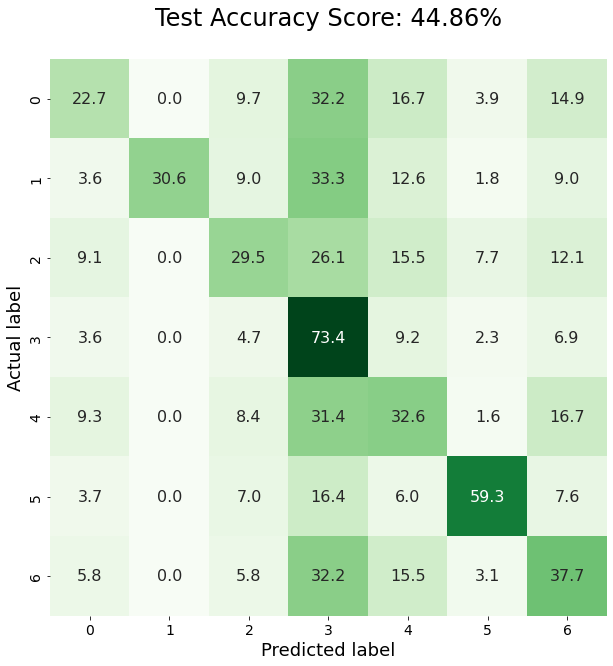

In [ ]:
plot_cm(confusion_matrix(y_test_org_array, loaded_model.predict(X_test_org_array)),result)

## HoG

In [ ]:
# Use 28 random trees
rf_org_hog = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org_hog.fit(X_train_hog,y_train_org_array)
#Saving the model in google drive 
filename = 'rf_org_hog.sav'
pickle.dump(rf_org_hog, open(filename, 'wb'))

0.4513792142658122


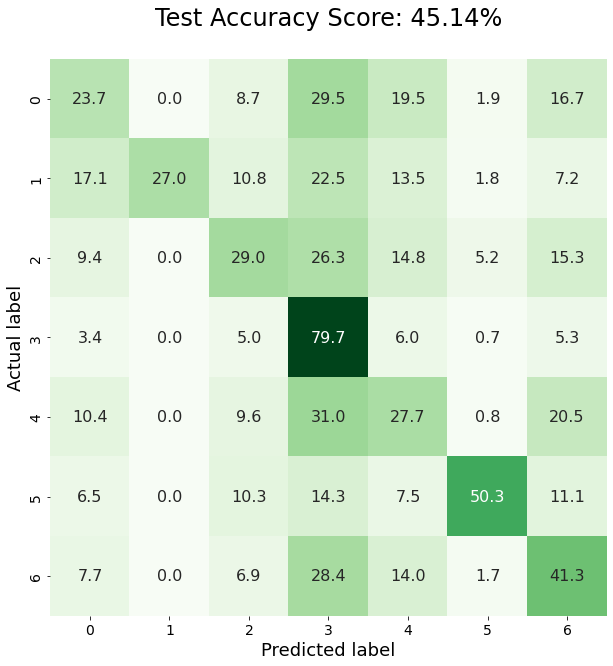

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_Test_hog, y_test_org_array)
print(result)
plot_cm(confusion_matrix(y_test_org_array, loaded_model.predict(X_Test_hog)),result)

In [ ]:
y_test_org_array

array([0, 0, 0, ..., 5, 5, 5])

In [ ]:
emotions=emotions_labelss

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_Test_hog, y_test_org_array)
print(result)
plot_cm(confusion_matrix(y_test_org_array, loaded_model.predict(X_Test_hog)),result)


ValueError: ignored

## Under Sample Data / Balanced Data

In [ ]:
#Converting data to numpy array and reshaping it
train_image_usample = np.array(train_image_usample).reshape(3052,48*48 )
train_label_usample = np.array(train_label_usample)
test_image_usample = np.array(test_image_usample).reshape(12012,48*48 )
test_label_usample = np.array(test_label_usample)

0.34065934065934067


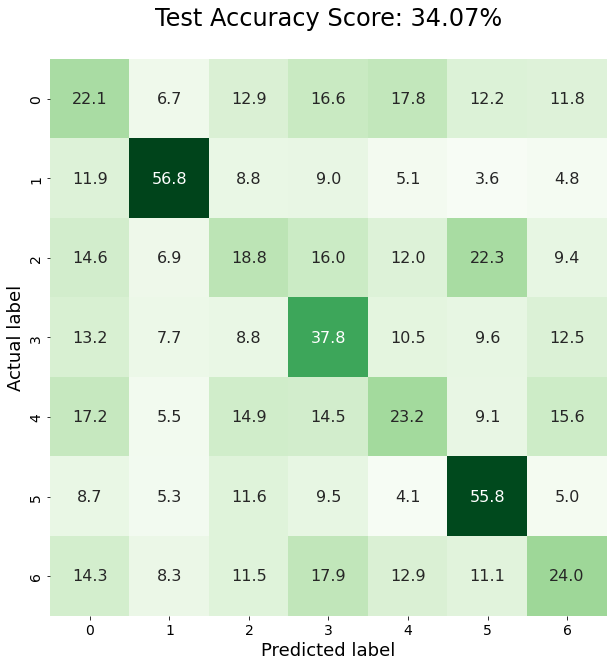

In [ ]:
# Use 28 random trees
rf_org_balanced_usersample = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org_balanced_usersample.fit(train_image_usample,train_label_usample)
#Saving the model in google drive 
filename = 'rf_org_balanced_usersample.sav'
pickle.dump(rf_org_balanced_usersample, open(filename, 'wb'))

#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_image_usample, test_label_usample)
print(result)
plot_cm(confusion_matrix(test_label_usample, loaded_model.predict(test_image_usample)),result)

## OverSample

In [ ]:
#Converting data to numpy array and reshaping it
train_image_usample = np.array(train_image_array).reshape(49175,48*48 )
train_label_usample = np.array(train_image_label)
test_image_usample = np.array(test_image_array).reshape(12012,48*48 )
test_label_usample = np.array(test_image_label)

0.41150516150516153


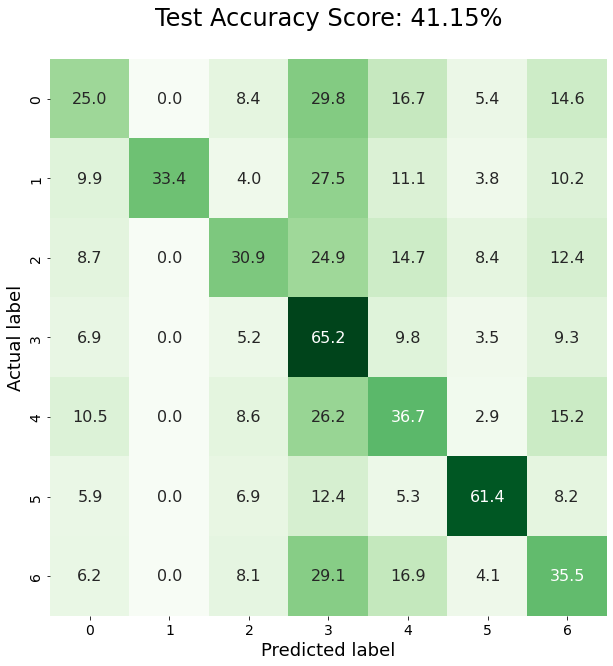

In [ ]:
# Use 28 random trees
rf_org_balanced_oversample = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org_balanced_oversample.fit(train_image_usample,train_label_usample)
#Saving the model in google drive 
filename = 'rf_org_balanced_oversample.sav'
pickle.dump(rf_org_balanced_oversample, open(filename, 'wb'))

#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_image_usample, test_label_usample)
print(result)
plot_cm(confusion_matrix(test_label_usample, loaded_model.predict(test_image_usample)),result)

## SIFT

In [ ]:
#Basic SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.0

In [ ]:
#Converting data to numpy array and reshaping it
train_image_usample = X_train
train_label_usample = y_train
test_image_usample = X_test
test_label_usample = y_test

0.2005661712668082


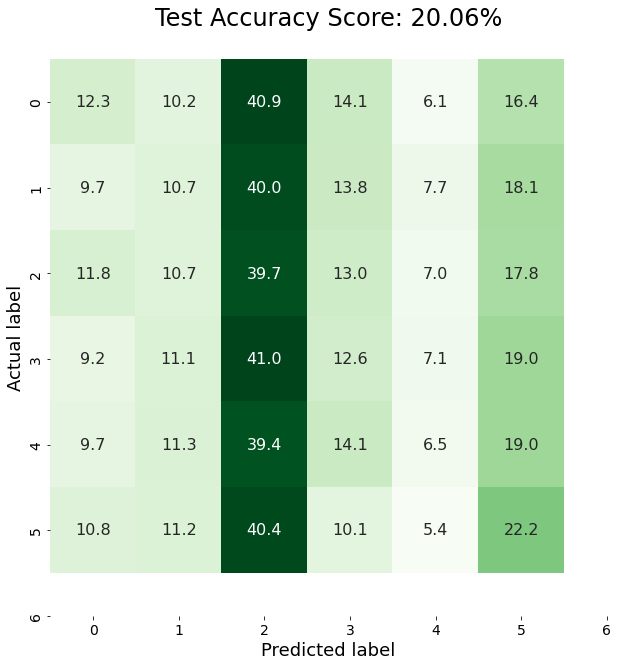

In [ ]:
# Use 28 random trees
rf_org_balanced_oversample = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)
rf_org_balanced_oversample.fit(train_image_usample,train_label_usample)
#Saving the model in google drive 
filename = 'rf_org_balanced_oversample.sav'
pickle.dump(rf_org_balanced_oversample, open(filename, 'wb'))

#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(test_image_usample, test_label_usample)
print(result)
plot_cm(confusion_matrix(test_label_usample, loaded_model.predict(test_image_usample)),result)

## Hog Rescaled

In [ ]:
print(classification_report(model_pred,y_Test))

              precision    recall  f1-score   support

           0       0.07      1.00      0.13        40
           1       0.17      1.00      0.29        11
           2       0.10      0.90      0.19        71
           3       0.18      0.87      0.30       230
           4       0.03      0.76      0.07        33
           5       0.32      0.93      0.48       162
           6       0.05      0.93      0.10        43

   micro avg       0.12      0.90      0.22       590
   macro avg       0.13      0.91      0.22       590
weighted avg       0.19      0.90      0.30       590
 samples avg       0.12      0.12      0.12       590



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X = df_final[:, 1]
y = df_final[:, 0]

In [ ]:
X.shape, y.shape

((86127,), (86127,))

In [ ]:
X = np.stack(X, axis = 0)
X = X.reshape(86127, 2304)
print(X.shape, y.shape)

(86127, 2304) (86127,)


In [ ]:
y = to_categorical(y)
y.shape

(86127, 7)

In [ ]:
# split the dataframe in to train, test and validation data frames

from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)


In [ ]:
print('validation data shape: ',X_val.shape, y_val.shape)
print('Testing data shape: ',X_Test.shape, y_Test.shape)
print('Training data shape: ',X_train.shape, y_train.shape)

validation data shape:  (4306, 2304) (4306, 7)
Testing data shape:  (4307, 2304) (4307, 7)
Training data shape:  (77514, 2304) (77514, 7)


# DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/DT

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/DT


In [ ]:
dt = DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy',
                       max_depth=5, max_features='auto',min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,random_state=1024, splitter='best')

In [ ]:
dt.fit(X_train_org_array,y_train_org_array)
#Saving the model in google drive 
filename = 'dt_org.sav'
pickle.dump(dt, open(filename, 'wb'))

In [ ]:
#Load the model and test for accuracy 
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test_org_array, y_test_org_array)
print(result)

0.24714405126776262


In [ ]:
result

0.24714405126776262

#Retry Random Forest

In [ ]:
#(49175, 48, 48, 1)

In [ ]:
train_image_array, train_image_label

In [ ]:
y = to_categorical(train_image_label)
y.shape

(49175, 7)

In [ ]:
X = train_image_array.reshape(49175, 48*48)
print(X.shape, y.shape)

(49175, 2304) (49175, 7)


In [ ]:
# split the dataframe in to train, test and validation data frames

from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)


In [ ]:
print('validation data shape: ',X_val.shape, y_val.shape)
print('Testing data shape: ',X_Test.shape, y_Test.shape)
print('Training data shape: ',X_train.shape, y_train.shape)

validation data shape:  (2459, 2304) (2459, 7)
Testing data shape:  (2459, 2304) (2459, 7)
Training data shape:  (44257, 2304) (44257, 7)


In [ ]:
# image pre-processing

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [ ]:
# Use 50 random trees
model = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=101)

In [ ]:
model_pred = model.predict(X_Test)

In [ ]:
accuracy_score(model_pred,y_Test)

0.0

# Test groud



In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [ ]:
# http://www.vision.caltech.edu/Image_Datasets/Caltech101/
# https://www.kaggle.com/manikg/training-svm-classifier-with-hog-features
%matplotlib inline
import numpy as np
from skimage.io import imread
from skimage.color import gray2rgb
from skimage.transform import resize
from skimage.feature import hog
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from glob import glob
from matplotlib import pyplot as plt

In [ ]:
images, hog_images = [], []
X, y = [], []
ppc = 8
sz = 48
for dir in sorted(glob('/content/train/*')):
    image_files = glob(dir + '/*.jpg')
    label = dir.split('/')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = resize(imread(image_file), (sz,sz))
        if len(image.shape) == 2: # if a gray-scale image
            image = gray2rgb(image)
        fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True, multichannel=True)
        images.append(image)
        hog_images.append(hog_image)
        X.append(fd)
        y.append(label)
    

angry 3995
disgust 436
fear 4097
happy 7215
neutral 4965
sad 4830
surprise 3171


In [ ]:
print(len(images), hog_images[0].shape, X[0].shape, X[1].shape, len(y))

3995 (48, 48) (1152,) (1152,) 3995


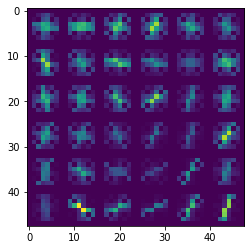

In [ ]:
plt.imshow(hog_images[0])

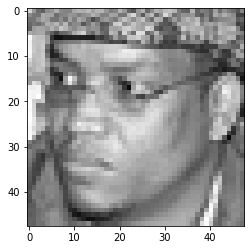

In [ ]:
plt.imshow(images[0])

In [ ]:
X = np.array(X)
y = np.array(y)
indices = np.arange(len(X))
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, indices, test_size=0.1, random_state=1)

In [ ]:
clf = LogisticRegression(C=1000, random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

image.shape

(512, 512, 3)

In [ ]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
features = []
for x in range(0, train_image[0].shape[0]): 
    features.append('feature '+ str(x))

In [ ]:
# Make dataframe 
df_train = pd.DataFrame(data = train_images_clean, 
                  columns = features).astype('uint8')
df_train.head(2)

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2294,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303
0,42,43,57,59,50,50,52,54,51,55,...,43,33,43,48,49,59,117,161,173,181
1,125,126,128,119,112,168,177,170,173,174,...,146,131,107,84,77,73,59,106,200,208


In [ ]:
df = pd.DataFrame(data = train_label, 
                  columns = ['emotion'])
df_train = df_train.join(df)

df_train.head(2)

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
0,42,43,57,59,50,50,52,54,51,55,...,33,43,48,49,59,117,161,173,181,disgust
1,125,126,128,119,112,168,177,170,173,174,...,131,107,84,77,73,59,106,200,208,disgust


In [ ]:
df_train.to_csv('train.csv',index=False)

#start data processing from CSV file 

In [ ]:
#create a dataframe using the data csv
df = pd.read_csv('/content/train.csv')
print(df.columns)
print(df.shape)
df.head(2)

Index(['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4',
       'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9',
       ...
       'feature 2295', 'feature 2296', 'feature 2297', 'feature 2298',
       'feature 2299', 'feature 2300', 'feature 2301', 'feature 2302',
       'feature 2303', 'emotion'],
      dtype='object', length=2305)
(28698, 2305)


,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
0,42,43,57,59,50,50,52,54,51,55,...,33,43,48,49,59,117,161,173,181,disgust
1,125,126,128,119,112,168,177,170,173,174,...,131,107,84,77,73,59,106,200,208,disgust


In [ ]:
plt.imshow(np.array(df.pixels[0].split(' ')).astype('float32').reshape(48,48))

In [ ]:
fig = plt.figure(1,(14,14))
x = 0

for label in sorted(df.emotion.unique()):
  for i in range(3):
    img = df[df.emotion == label].pixels.iloc[x]
    img = img.reshape(48,48)
    x +=1

    ax = plt.subplot(7,7,x)
    ax.imshow(img)
    ax.set_title(emotions_label_text[label])
    plt.tight_layout()

In [ ]:
#create a dataframe using the data csv
df = pd.read_csv('/content/data.csv')
print(df.columns)
print(df.shape)
df.head(2)

Index(['Unnamed: 0', 'file', 'emotion', 'pixels'], dtype='object')
(7178, 4)


,Unnamed: 0,file,emotion,pixels
0,0,PrivateTest_45699463.jpg,3,5 4 5 9 10 9 10 12 8 14 13 17 24 26 36 48 67 7...
1,1,PrivateTest_61855708.jpg,3,19 21 22 18 20 21 16 18 19 18 20 23 23 14 16 1...


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)
print(df.columns)
df.head(2)

Index(['file', 'emotion', 'pixels'], dtype='object')


,file,emotion,pixels
0,PrivateTest_45699463.jpg,3,5 4 5 9 10 9 10 12 8 14 13 17 24 26 36 48 67 7...
1,PrivateTest_61855708.jpg,3,19 21 22 18 20 21 16 18 19 18 20 23 23 14 16 1...


In [ ]:
df.tail()

NameError: ignored

In [ ]:
np.array(df.pixels[0].split(' ')).astype('float32').reshape(48,48)

array([[ 5.,  4.,  5., ..., 12.,  3.,  8.],
       [ 3.,  5.,  7., ..., 10.,  8.,  8.],
       [ 2.,  6.,  8., ...,  3.,  8.,  5.],
       ...,
       [ 8.,  8., 10., ..., 13., 16., 13.],
       [11.,  7.,  8., ..., 19., 16.,  8.],
       [15.,  7., 10., ..., 17., 13., 11.]], dtype=float32)

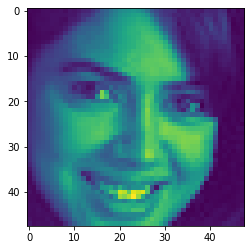

In [ ]:
plt.imshow(np.array(df.pixels[0].split(' ')).astype('float32').reshape(48,48))

In [ ]:
df['pixels']= df['pixels'].apply(lambda x: np.array(x.split(' ')).astype('float32').reshape(48,48))

In [ ]:
df['pixels'][0].shape

(48, 48)

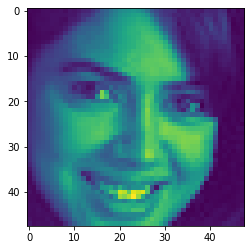

In [ ]:
plt.imshow(df['pixels'][0])

In [ ]:
df.head()

,file,emotion,pixels
0,PrivateTest_45699463.jpg,3,"[[5.0, 4.0, 5.0, 9.0, 10.0, 9.0, 10.0, 12.0, 8..."
1,PrivateTest_61855708.jpg,3,"[[19.0, 21.0, 22.0, 18.0, 20.0, 21.0, 16.0, 18..."
2,PublicTest_53681781.jpg,3,"[[228.0, 229.0, 230.0, 229.0, 228.0, 227.0, 22..."
3,PrivateTest_52109800.jpg,3,"[[25.0, 33.0, 43.0, 30.0, 46.0, 84.0, 105.0, 1..."
4,PublicTest_41104919.jpg,3,"[[33.0, 29.0, 15.0, 15.0, 20.0, 36.0, 40.0, 54..."


In [ ]:
# df['lables'] = df.file.apply(lambda x: x.split('_')[0])
df['lables'] = df.file.apply(lambda x: 1 if 'Test' in x else 0)
df['lables'].value_counts()

1    7178
Name: lables, dtype: int64

In [ ]:
# pip install opencv-python==3.4.3.18
import cv2

In [ ]:
gray = df['pixels'][0]

In [ ]:
gray.shape

(48, 48)

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')


In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

error: ignored

In [ ]:
# import numpy as np
# import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

     |████████████████████████████████| 25.0 MB 64.8 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

error: ignored

In [ ]:
from google.colab.patches import cv2

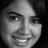

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(gray)

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = sorted(df.emotion.value_counts().index), y = df.emotion.value_counts())

In [ ]:
from skimage.io import imread
import numpy as np
import matplotlib.image as img
import pandas as pd

emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
train_data = []
train_dir = '/content/train'
for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          # obj = imread(os.path.join(dirname, filename)).flatten()
          print(type(obj), len(obj), obj.shape)
          #train_data.append((emotions[cat], obj, file))
          train_data.append((1,obj))
          break


<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)


In [ ]:
df = pd.DataFrame(train_data)
df.shape

(7, 2)

In [ ]:
df.head(1)

,0,1
0,1,"[255, 254, 255, 232, 115, 102, 80, 62, 50, 53,..."


In [ ]:
len(df[1][0])

2304

In [ ]:
df.to_csv('gfgfile.csv',
              header = ['l','p'],
              index = None)

In [ ]:
df.to_csv('gfgfile.csv',
              header = None,
              index = None)

In [ ]:
df1 = pd.read_csv('/content/text')

In [ ]:
len(df1.head(1).split(' '))

AttributeError: ignored

In [ ]:
from skimage.io import imread
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
train_data = []
train_dir = '/content/train'
for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          # obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          obj = imread(os.path.join(dirname, filename)).flatten()
          print(type(obj), len(obj), obj.shape)
          train_data.append((emotions[cat], obj, file))
          break


<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)


In [ ]:
train_data[0]

(5,
 array([255, 254, 255, ..., 127, 179, 191], dtype=uint8),
 '/content/train/surprise/Training_98972491.jpg')

In [ ]:
for x,y,z in train_data:
  print(len(y))
  print(len(str(y)))


2304
29
2304
29
2304
29
2304
29
2304
29
2304
29
2304
23


In [ ]:
df1 = pd.read_csv('/content/a_file.txt')
df1.head()

,(5,array([255,254,255,...,127,179,191],dtype=uint8),'/content/train/surprise/Training_98972491.jpg')
0,(6,array([201,201,203,...,97,92,91],dtype=uint8),'/content/train/neutral/Training_9443885.jpg')
1,(2,array([111,127,155,...,236,230,213],dtype=uint8),'/content/train/fear/Training_77272441.jpg')
2,(1,array([ 59,40,59,...,165,163,163],dtype=uint8),'/content/train/disgust/Training_33936842.jpg')
3,(0,array([150,171,199,...,101,103,101],dtype=uint8),'/content/train/angry/Training_58517344.jpg')
4,(4,array([147,151,144,...,0,1,0],dtype=uint8),'/content/train/sad/Training_7410773.jpg')


In [ ]:
df1[1]

KeyError: ignored

In [ ]:
a_list = ["abc", "def", "ghi"]
textfile = open("a_file.txt", "w")
for element in a_list:
    textfile.write(element + "\n")
textfile.close()

In [ ]:
type(train_data[0])

list

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(2)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...


In [ ]:
print('len of trian data list:', len(train_data),len(train_label))
print('len of one pixel:', len(train_data[0]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(list(zip(train_label, train_data)),
               columns =['emotion','pixels'])

df.to_csv('file_name1.txt', index=None, sep='\t', mode='a')
df1 = pd.read_csv('/content/file_name1.txt')
print(len(df1.pixels[0]))
df1.head()

len of trian data list: 7 0
len of one pixel: 2304
29


,emotion,pixels,dir
0,5,[255 254 255 ... 127 179 191],/content/train/surprise/Training_98972491.jpg
1,6,[201 201 203 ... 97 92 91],/content/train/neutral/Training_9443885.jpg
2,2,[111 127 155 ... 236 230 213],/content/train/fear/Training_77272441.jpg
3,1,[ 59 40 59 ... 165 163 163],/content/train/disgust/Training_33936842.jpg
4,0,[150 171 199 ... 101 103 101],/content/train/angry/Training_58517344.jpg


In [ ]:
print('len of trian data list:', len(train_data))
print('len of one pixel:', len(train_data[1][1]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(train_data, columns = ['emotion','pixels','dir'])

len of trian data list: 7
len of one pixel: 2304


In [ ]:
df.to_csv('file_name1.txt', index=None, sep='\t', mode='a')
df1 = pd.read_csv('/content/file_name1.txt')
print(len(df1.pixels[0]))
df1.head()

29


,emotion,pixels,dir
0,5,[255 254 255 ... 127 179 191],/content/train/surprise/Training_98972491.jpg
1,6,[201 201 203 ... 97 92 91],/content/train/neutral/Training_9443885.jpg
2,2,[111 127 155 ... 236 230 213],/content/train/fear/Training_77272441.jpg
3,1,[ 59 40 59 ... 165 163 163],/content/train/disgust/Training_33936842.jpg
4,0,[150 171 199 ... 101 103 101],/content/train/angry/Training_58517344.jpg


In [ ]:
len(df1.pixels[0])

29

In [ ]:
#Extracting the data and saving it into list
#need to improve code with how we are extracting "cat"
from zipfile import ZipFile
import matplotlib.image as mpimg
import os
train_data = []
train_dir = '/content/train'
# test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
with ZipFile('/content/archive.zip', 'r') as f:
  f.extractall()

for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          train_data.append((emotions[cat], obj, file))

In [ ]:
print('len of trian data list:', len(train_data))
print('len of one pixel:', len(train_data[1][1]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(train_data, columns = ['emotion','pixels','dir'])

len of trian data list: 7
len of one pixel: 2304


In [ ]:
print('shape of the traning dataframe: ', df.shape)
print('data type of the pixel: ', type(df.pixels[0]))

shape of the traning dataframe:  (7, 3)
data type of the pixel:  <class 'numpy.ndarray'>


In [ ]:
df.head(2)

,emotion,pixels,dir
0,5,"[255, 254, 255, 232, 115, 102, 80, 62, 50, 53,...",/content/train/surprise/Training_98972491.jpg
1,6,"[201, 201, 203, 198, 202, 207, 215, 212, 217, ...",/content/train/neutral/Training_9443885.jpg


In [ ]:
df.pixels[0]
print(len(df.pixels[0]))

2304


In [ ]:
train_img = df.pixels.apply(lambda x: x.reshape(48,48,1))

In [ ]:
df['pixels']

0    [255, 254, 255, 232, 115, 102, 80, 62, 50, 53,...
1    [201, 201, 203, 198, 202, 207, 215, 212, 217, ...
2    [111, 127, 155, 180, 189, 197, 191, 131, 75, 8...
3    [59, 40, 59, 63, 29, 26, 30, 24, 35, 64, 86, 9...
4    [150, 171, 199, 201, 138, 31, 49, 65, 77, 88, ...
5    [147, 151, 144, 153, 154, 155, 164, 164, 164, ...
6    [59, 60, 39, 27, 24, 51, 26, 10, 23, 20, 21, 3...
Name: pixels, dtype: object

In [ ]:
df.pixels[0].reshape(48,48)

array([[248, 247, 173, ..., 158, 160, 168],
       [253, 249, 186, ..., 159, 163, 161],
       [254, 254, 184, ..., 153, 157, 172],
       ...,
       [ 36,  42,  92, ...,   2,   0,   0],
       [ 42,  72, 139, ...,   0,   0,   1],
       [ 50, 127, 137, ...,   1,   1,   0]], dtype=uint8)

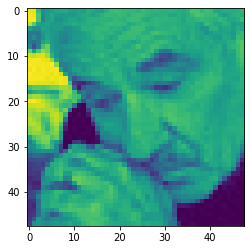

In [ ]:
#lets look at one image 
plt.imshow(df.pixels[0].reshape(48,48))

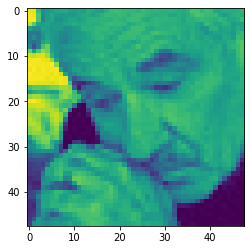

In [ ]:
#view an imapge directly from image file 
plt.imshow(mpimg.imread(df.dir[0]))

In [ ]:
emotions_label_text = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}

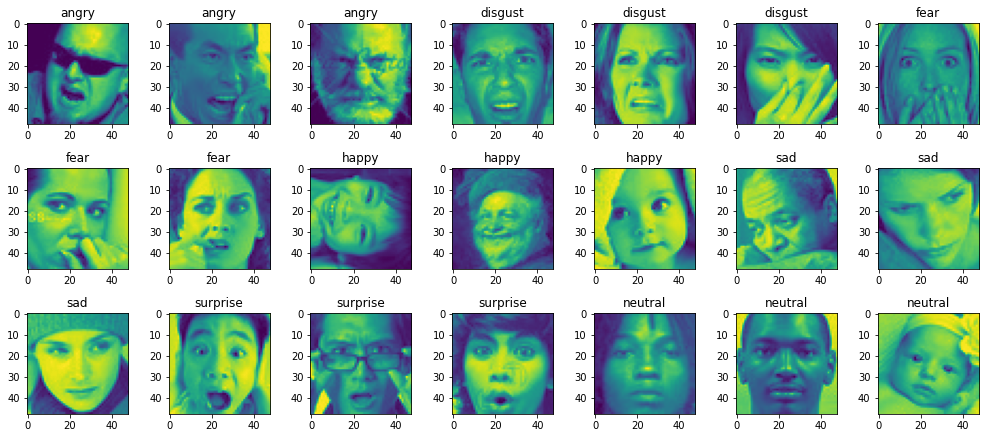

In [ ]:
fig = plt.figure(1,(14,14))
x = 0

for label in sorted(df.emotion.unique()):
  for i in range(3):
    img = df[df.emotion == label].pixels.iloc[x]
    img = img.reshape(48,48)
    x +=1

    ax = plt.subplot(7,7,x)
    ax.imshow(img)
    ax.set_title(emotions_label_text[label])
    plt.tight_layout()

# Data & data visualization

## CNN

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = sorted(df.emotion.value_counts().index), y = df.emotion.value_counts())

In [ ]:
train_img = df.pixels.apply(lambda x: x.reshape(48,48,1))

NameError: ignored

In [ ]:
X = np.stack(train_img, axis=0)
y = df.emotion.values

In [ ]:
print('shape of our image array: ', X.shape)
print('shape of our labels array: ', y.shape)
# plt.imshow(X[0])
# plt.title(emotions_label_text[y[0]])

In [ ]:
print(X[0].shape)
X[0]

In [ ]:
print(y.shape)
y

In [ ]:
#one hot encoding the label data 
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
print(y.shape)
y

In [ ]:
from sklearn.model_selection import train_test_split
#spliting data into test and train 
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)

In [ ]:
X_train.shape, X_Test.shape, y_train.shape, y_Test.shape

In [ ]:
# image pre-processing
X_train = X_train/255
X_Test  = X_Test/255

In [ ]:
# Generate Training and Validation Batches
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("/content/train",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("/content/test",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

In [ ]:
pip install livelossplot 

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

In [ ]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

In [ ]:
%%time

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

# PayGroud Start CNN

In [ ]:
tf_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [ ]:
tf_model.summary()

In [ ]:
tf_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),
                 loss = "sparse_categorical_crossentropy",
                 metrics = ['accuracy']
)

In [ ]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
input_shape = (48, 48, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

## Load Model

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Accuracy: 99.91%


# Function

In [ ]:
def plot_cm(cm,testscore):
  '''provide cm item and test score'''
  cm_labels_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  cm_labels_norm = cm_labels_norm * 100.00

  plt.figure(figsize=(9,9))
  sns.heatmap(cm_labels_norm,
              annot=True, 
              annot_kws={'size':16},
              fmt=".1f",
            cmap='Greens',
            xticklabels=[i for i in emotions.values()],
            yticklabels=[i for i in emotions.values()],
            square=True,
            cbar=False)
  plt.title('Test Accuracy Score: {0}%\n'.format("%.2f" % (testscore*100.0)), size=24)
  plt.tight_layout()
  plt.xticks(size=14)
  plt.yticks(size=14)
  plt.ylabel('Actual label', size=18)
  plt.xlabel('Predicted label', size=18)
  plt.show()

In [ ]:
def import_data_return2set(dir, labels_dic):
  '''this funciton will be used to extract image data into 2 list,
  1st list labels will contain labels information and 
  2nd list images will contain flaten pixels of each image.
  - image data is already reshed into 48,48 numpy array'''
  
  data=[]
  labels= []
  labels_code = []
  for directory in sorted(glob(dir+'/*')):
    image_files = glob(directory + '/*.jpg')
    label = directory.split('/')[-1]
    for image_file in image_files:
     # image = resize(imread(image_file), (48,48))
      data.append(resize(imread(image_file), (48,48)))
      labels.append(labels_dic[label])
      labels_code.append(label)

  return data, labels,labels_code

In [ ]:
def import_data(dir):
  '''this funciton will be used to extract image data into 2 list,
  1st list labels will contain labels information and 
  2nd list images will contain flaten pixels of each image.
  - image data is already reshed into 48,48 numpy array'''

  data=[]
  for directory in sorted(glob(dir+'/*')):
    image_files = glob(directory + '/*.jpg')
    label = directory.split('/')[-1]
    for image_file in image_files:
      image = resize(imread(image_file), (48,48))
      data.append(( label, image))
  return data

In [ ]:
def load_data(df, data_type):
    """Load data from DataFrame and return data to list 
    """
    image_data = []
    image_scaled = []
    
    for index, row in df.iterrows():
        if data_type == 1:
            field = row.pca
        elif data_type == 2:
            field = row.histogram
        elif data_type == 3:
            field = row.hog
        elif data_type == 4:
            field = row.lda
        else:
            field = row.pixels
        image = np.fromstring(field, sep=' ')
        image_data.append(image)
        if data_type == 0:
            scale = image / 255.0
            image_scaled.append(scale)
        
    return image_data, image_scaled

In [ ]:
def custom_train_test_split(csv, data_type):
    """process the data output will be 
    X_train, X_test, y_train, y_test
    """
    print(csv)
    df = pd.read_csv(csv)
    # shuffle the DataFrame rows
    df = df.sample(frac = 1)
    df_train = df[df['usage']=='train']
    df_test = df[df['usage']=='test']
    #we are taking a subset of our Data frame with only training data 
    train_data, _ = load_data(df_train, data_type)
    #we are taking a subset of our data frame with only testing data 
    test_data, _ = load_data(df_test, data_type)

    print('Shape of data > :', '(X_train, X_test, y_train, y_test)', 
          np.array(train_data).shape, 
          np.array(test_data).shape, 
          np.array(df_train.emotion).shape, 
          np.array(df_test.emotion).shape)

    return (np.array(train_data), 
            np.array(test_data), 
            np.array(df[df['usage']=='train'].emotion), 
            np.array(df_test.emotion))

In [ ]:
def processSDG(csv, data_type):
    """Process SVM for each csv data
    """
    print(csv)
    df = pd.read_csv(csv)
    df.head()
    
    df_train = df[df['usage']=='train']
    df_test = df[df['usage']=='test']
    train_data, train_scaled = load_data(df_train, data_type)
    train_target = list(df_train.emotion)
    test_data, test_scaled = load_data(df_test, data_type)
    test_target = list(df_test.emotion)
    
    X_train = np.array(train_data)
    y_train = np.array(train_target)
    X_test = np.array(test_data)
    y_test = np.array(test_target)
    
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    print(y_test.shape)
    
    #Orginal Data 
    model = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
    #model = SVC(C=5, random_state=1, kernel='rbf', gamma='auto', decision_function_shape='ovo')

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_score=accuracy_score(y_test, y_pred)
    #print(model.score(X_train, y_train))
    print('Train Accuracy: %.3f' % model.score(X_train, y_train))
    print('Test Accuracy: %.3f' % model.score(X_test, y_test))
    
    return y_pred, y_test

In [ ]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.0] = 0
    return loss
